In [2]:
import fastf1
import pandas as pd
from scipy import signal
import numpy as np

In [3]:
fastf1.Cache.enable_cache('fastf1_cache/')
session = fastf1.get_session(2023, "Azerbaijan Grand Prix", "R")
session.load()

core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v2.3.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/Users/robin/miniconda3/envs/pitwall/lib/python3.11/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
/Users/robin/miniconda3/envs/pitwall/lib/python3.11/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df,

In [4]:
lap = session.laps.loc[session.laps.index == 182]

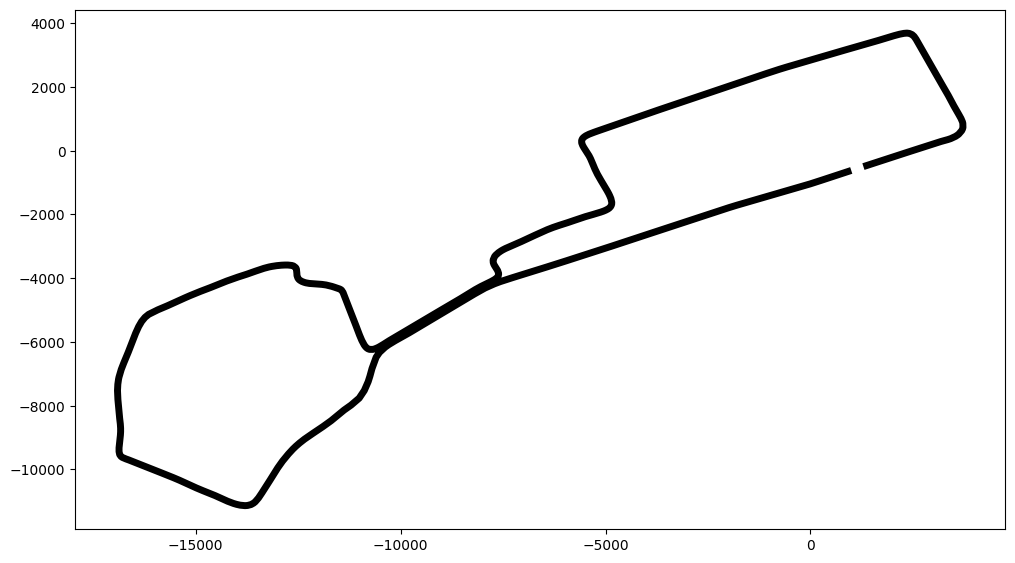

In [5]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
data = lap.get_pos_data()
ax.plot(data['X'], data['Y'], color='black', linestyle='-', linewidth=5, zorder=0)
plt.show()

In [6]:
pos_data = lap.get_pos_data()
pos_data = pos_data["X"]
pos_data /= 10

In [7]:
pos_data = pos_data.to_numpy()

In [8]:
def plot(pos_data, window_length, polyorder):
    smooth = signal.savgol_filter(pos_data, window_length=window_length, polyorder=polyorder, mode="nearest")
    smooth = pd.DataFrame(smooth)
    smooth.plot()

<Axes: >

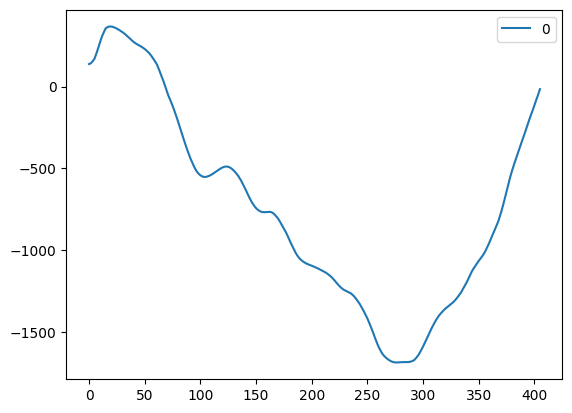

In [10]:
padded_pos_data = np.concatenate(([pos_data[0] for _ in range(9)], pos_data))
naiive_conv = np.convolve(padded_pos_data, [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], mode="valid")
naiive_conv = pd.DataFrame(naiive_conv)
naiive_conv.plot()

<Axes: >

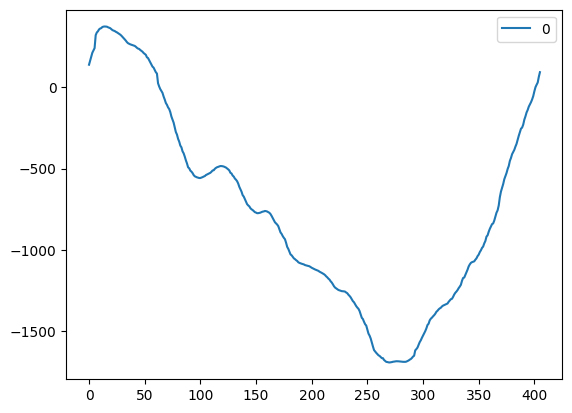

In [9]:
raw = pd.DataFrame(pos_data)
raw.plot()

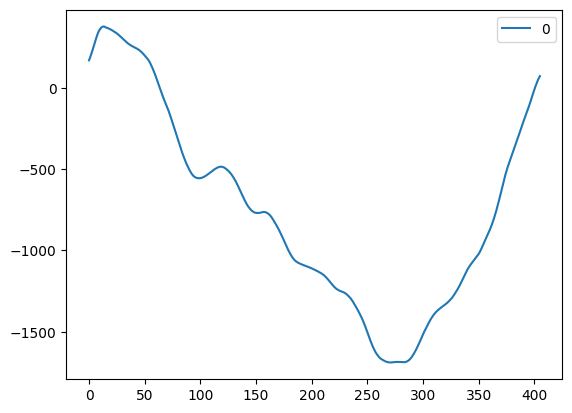

In [130]:
plot(pos_data, window_length=20, polyorder=2)

In [131]:
coeffs = signal.savgol_coeffs(window_length=20, polyorder=2)
coeffs

array([-0.05795455, -0.02386364,  0.00643939,  0.03295455,  0.05568182,
        0.07462121,  0.08977273,  0.10113636,  0.10871212,  0.1125    ,
        0.1125    ,  0.10871212,  0.10113636,  0.08977273,  0.07462121,
        0.05568182,  0.03295455,  0.00643939, -0.02386364, -0.05795455])